In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from pprint import pprint
import matplotlib.pyplot as mtp    

In [74]:
file_path = '/Users/chiaradraghini/Documents/iot_wi_project/data/dataset/'
dataframe = pd.read_csv(file_path+'Dataset_iotwi.csv')
dataframe.drop(['Unnamed: 0'], axis=1, inplace=True)
dataframe

,Time Interval,Average Packet Size,Standard Deviation Packet Size,Median Packet Size,Average Packet Intervals,Standard Deviation Packet Intervals,Median Packet Intervals,Inbound Packets,Outbound Packets,Total Packets
0,"(0, 0.5)",956.114286,208.242569,1023.0,0.004413,0.005065,0.000492,47,58,105
1,"(0.5, 1.0)",933.644928,241.450296,961.0,0.003510,0.004490,0.000742,77,61,138
2,"(1.0, 1.5)",919.227273,252.522348,888.5,0.003205,0.004270,0.000585,95,59,154
3,"(1.5, 2.0)",955.713115,227.083975,1078.0,0.004066,0.004688,0.001061,64,58,122
4,"(2.0, 2.5)",929.561404,248.768508,1028.0,0.004378,0.004975,0.001581,61,53,114
...,...,...,...,...,...,...,...,...,...,...
1200,"(600.0, 600.5)",1031.739583,321.145294,1131.0,0.004865,0.006184,0.000956,78,18,96
1201,"(600.5, 601.0)",974.734043,331.268146,1108.5,0.005336,0.006885,0.001814,73,21,94
1202,"(601.0, 601.5)",993.343434,331.198755,1126.0,0.004406,0.006043,0.001021,80,19,99
1203,"(601.5, 602.0)",995.216495,317.852994,1118.0,0.004635,0.006014,0.000910,74,23,97


In [75]:
scaler = StandardScaler()
cols_to_keep = ["Average Packet Size","Standard Deviation Packet Size","Median Packet Size","Average Packet Intervals","Standard Deviation Packet Intervals", "Median Packet Intervals" ,"Inbound Packets", "Outbound Packets","Total Packets"]
df_filtered = dataframe.loc[:,cols_to_keep]
scaled_array = scaler.fit_transform(df_filtered)
scaled_dataframe = pd.DataFrame(scaled_array)
print(scaled_dataframe)

             0         1         2         3         4         5         6  \
0    -0.090126 -1.017752 -0.289962  0.066554 -0.541637 -0.921972 -1.948106   
1    -0.368968 -0.480722 -0.870026 -0.953856 -0.948054 -0.532813  0.440688   
2    -0.547890 -0.301667 -1.548327 -1.299508 -1.103196 -0.777205  1.873965   
3    -0.095104 -0.713052  0.224611 -0.325984 -0.808228 -0.037025 -0.594456   
4    -0.419644 -0.362373 -0.243183  0.026374 -0.604804  0.773203 -0.833336   
...        ...       ...       ...       ...       ...       ...       ...   
1200  0.848377  0.808093  0.720472  0.577273  0.249799 -0.199694  0.520314   
1201  0.140944  0.971798  0.509965  1.109943  0.745177  1.135121  0.122182   
1202  0.371885  0.970676  0.673693  0.058398  0.150223 -0.098512  0.679567   
1203  0.395129  0.754850  0.598846  0.317398  0.129136 -0.271299  0.201809   
1204  0.603811  1.147433  0.580134  1.014031  1.022794  1.023821  0.042556   

             7         8  
0     0.611720 -0.505429  
1     0.7

In [76]:
kmeans_model = KMeans(n_clusters = 2, max_iter=200, random_state=0)
kmeans_model.fit(scaled_dataframe)
centroids = kmeans_model.cluster_centers_
print("Centroids:\n", centroids)

Centroids:
 [[-0.05628791  0.87184105  0.44934798  0.96082045  1.0031823   0.50752431
   0.03354124 -1.02213711 -0.96784819]
 [ 0.03688095 -0.5712475  -0.29442168 -0.62954856 -0.65730489 -0.33253996
  -0.02197689  0.66972446  0.63415328]]


In [77]:
#labels corresponding to those clusters
kmeans_model.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [78]:
#accuracy of clustering corresponding to those clusters
from sklearn.metrics import accuracy_score, precision_score

file_path = '/Users/chiaradraghini/Documents/iot_wi_project/data/dataset/'
data_for_persona = pd.read_csv(file_path+'Dataset_iotwi_persona.csv', sep = ";") #a column "Persona" with "truth table" was added
data_for_persona.drop(['Unnamed: 0'], axis=1, inplace=True)
persona = data_for_persona["Persona"]
accuracy = accuracy_score(kmeans_model.labels_, persona)
precision = precision_score(kmeans_model.labels_, persona)
print(accuracy, precision)
#Accuracy is the ratio of correctly predicted observation to the total observations

0.8381742738589212 0.9463986599664992


In [79]:
from sklearn import metrics
print(metrics.confusion_matrix(persona, kmeans_model.labels_,))
conf_matrix = metrics.confusion_matrix(persona, kmeans_model.labels_)

[[445 163]
 [ 32 565]]


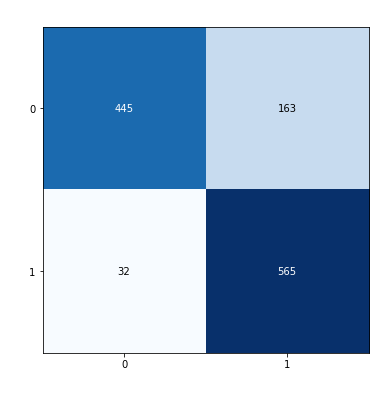

In [80]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18, color = "white")
plt.ylabel('Actuals', fontsize=18, color = "white")
plt.title('Confusion Matrix', fontsize=18, color = "white")
plt.show()

In [81]:
print(metrics.classification_report(persona, kmeans_model.labels_))
#Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
#Recall is how many of the true positives were recalled (found)
#F1 Score is the weighted average of Precision and Recall
#Support is the number of actual occurrences of the class in the specified dataset
report = metrics.classification_report(persona, kmeans_model.labels_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       608
           1       0.78      0.95      0.85       597

    accuracy                           0.84      1205
   macro avg       0.85      0.84      0.84      1205
weighted avg       0.86      0.84      0.84      1205



In [82]:
dataframe["Cluster"] = kmeans_model.labels_
dataframe["Persona"] = persona
dataframe.to_csv("/Users/chiaradraghini/Documents/iot_wi_project/data/results_kmeans/Clustering.csv")
report_df.to_csv("/Users/chiaradraghini/Documents/iot_wi_project/data/results_kmeans/Metrics_report.csv")